#Inicializacion

In [2]:
#install control without showing results
!pip install control > /dev/null

In [2]:
pip install sympy > /dev/null

Note: you may need to restart the kernel to use updated packages.


In [3]:
from sympy import *
import numpy as np
import scipy.io
import control
from control.matlab import *
import matplotlib.pyplot as plt
init_printing()

#Modelado mecanico

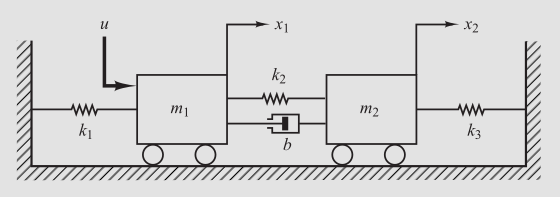
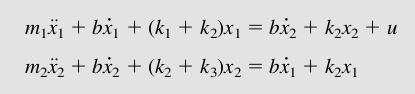

In [4]:
x1, x2, m1, m2, k1, k2, k3, b, u, s=symbols('x1 x2 m1 m2 k1 k2 k3 b u s')
eq1=Eq(m1*x1*s*s+b*x1*s+(k1+k2)*x1-b*x2*s-k2*x2-u,0)
eq2=Eq(m2*x2*s*s+b*x2*s+(k2+k3)*x2-b*x1*s-k2*x1,0)
sol=solve((eq1,eq2),(x1,x2))

In [5]:
print('x1/u = ')
factor(sol[x1]/u).collect(s)

x1/u = 


                                                              2                                    ↪
                                          b⋅s + k₂ + k₃ + m₂⋅s                                     ↪
────────────────────────────────────────────────────────────────────────────────────────────────── ↪
                               4    3                  2                                           ↪
k₁⋅k₂ + k₁⋅k₃ + k₂⋅k₃ + m₁⋅m₂⋅s  + s ⋅(b⋅m₁ + b⋅m₂) + s ⋅(k₁⋅m₂ + k₂⋅m₁ + k₂⋅m₂ + k₃⋅m₁) + s⋅(b⋅k₁ ↪

↪         
↪         
↪ ────────
↪         
↪  + b⋅k₃)

In [6]:
print('x2/u = ')
factor(sol[x2]/u).collect(s)

x2/u = 


                                                 b⋅s + k₂                                          ↪
────────────────────────────────────────────────────────────────────────────────────────────────── ↪
                               4    3                  2                                           ↪
k₁⋅k₂ + k₁⋅k₃ + k₂⋅k₃ + m₁⋅m₂⋅s  + s ⋅(b⋅m₁ + b⋅m₂) + s ⋅(k₁⋅m₂ + k₂⋅m₁ + k₂⋅m₂ + k₃⋅m₁) + s⋅(b⋅k₁ ↪

↪         
↪ ────────
↪         
↪  + b⋅k₃)

#Punto 1

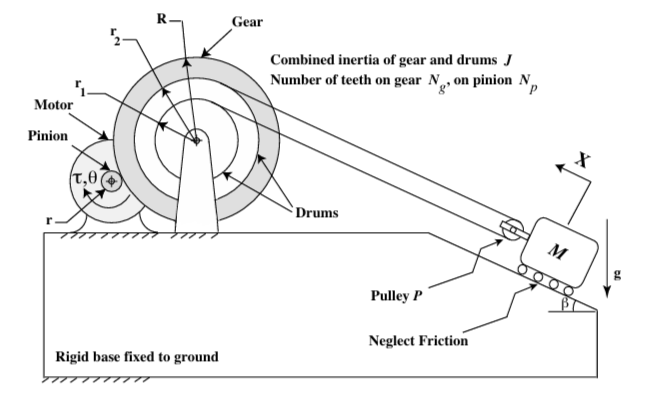

In [7]:
tau, M, g, b, J, t, T1, T1_p, T1_pp, T2, T2_p, T2_pp, r, R, r1, r2, x, x_pp=symbols('tau M g b J t T1 T1_p T1_pp T2 T2_p T2_pp r R r1 r2 x x_pp')
eq1=Eq(T1*r-T2*R,0)
eq2=Eq(T2*(r1+r2)-x*2,0)
eq3=Eq(t*(r1+r2)-J*T1_pp*r/R,0)
eq4=Eq(2*t-M*g*sin(b)-M*x_pp,0)
eq5=Eq(-x_pp+T1_pp*R/2/r*(r1+r2),0)
eq6=Eq(2*t-tau,0)
sol=solve((eq1,eq2),(x,T2))
print("x/T1 = ")
factor(sol[x])/T1

x/T1 = 


r⋅(r₁ + r₂)
───────────
    2⋅R    

In [8]:
sol2=(solve((eq3,eq4,eq6),(T1_pp,t,tau)))
pretty_print(sol2[tau])

M⋅g⋅sin(b) + M⋅xₚₚ


In [9]:
factor(sol2[tau].subs([(R, 0.4), (r1, 0.2), (r2, 0.3), (r, 0.05), (M, 50), (g, 9.8), (b, 30*3.1416/180), (J, 5),(x_pp, 0.1*9.8)]))

294.000519577675

In [10]:
sol3=(solve((eq3,eq6),(T1_pp,tau)))
pretty_print(sol2[tau])

M⋅g⋅sin(b) + M⋅xₚₚ


In [11]:
F, tau, M, g, b, J, t, T1, T1_p, T1_pp, T2, T2_p, T2_pp, r, R, r1, r2, x, x_pp=symbols('F tau M g b J t T1 T1_p T1_pp T2 T2_p T2_pp r R r1 r2 x x_pp')
eq1=Eq(T1*r-T2*R,0)                   #Relacion de Titas
eq2=Eq(T2*(r1+r2)-x*2,0)              #
eq3=Eq(-F*R+t*(r1+r2)-J*T1_pp*r/R,0)  #eq de momentos
eq4=Eq(2*t-M*g*sin(b)-M*x_pp,0)       #
eq5=Eq(-F+tau/r,0)
eq6=Eq(-x_pp+T1_pp*R/2/r*(r1+r2),0)
sol=solve((eq1,eq2),(x,T2))
print("x/T1 = ")
factor(sol[x])/T1

x/T1 = 


r⋅(r₁ + r₂)
───────────
    2⋅R    

In [12]:
F, tau, M, g, b, J, t, T1, T1_p, T1_pp, T2, T2_p, T2_pp, r, R, r1, r2, x, x_pp=symbols('F tau M g b J t T1 T1_p T1_pp T2 T2_p T2_pp r R r1 r2 x x_pp')
eq1=Eq(M*x_pp+M*g*sin(b)-2/(r1+r2)*(J*T1_pp*r/R+tau*R/r),0)
eq2=Eq(-x_pp+T1_pp*r/2/R*(r1+r2),0)
sol3=solve((eq1,eq2),(tau,T1_pp))
factor(sol3[tau])

  ⎛                 2                                     2              2                         ↪
r⋅⎝-4⋅J⋅xₚₚ + M⋅g⋅r₁ ⋅sin(b) + 2⋅M⋅g⋅r₁⋅r₂⋅sin(b) + M⋅g⋅r₂ ⋅sin(b) + M⋅r₁ ⋅xₚₚ + 2⋅M⋅r₁⋅r₂⋅xₚₚ + M ↪
────────────────────────────────────────────────────────────────────────────────────────────────── ↪
                                               2⋅R⋅(r₁ + r₂)                                       ↪

↪    2    ⎞
↪ ⋅r₂ ⋅xₚₚ⎠
↪ ─────────
↪          

In [13]:
factor(sol3[tau].subs([(R, 0.4), (r1, 0.2), (r2, 0.3), (r, 0.05), (M, 50), (g, 9.8), (b, 30*3.1416/180), (J, 5),(x_pp, 0.1*9.8)]))

6.73751623680236

#Punto 2

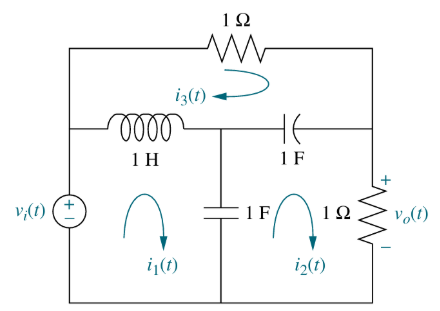

In [14]:
i1, i2, i3, vi, vo, r1, r2, l, c1, c2, s=symbols('i1 i2 i3 vi vo r1 r2 l c1 c2 s')
eq1=Eq(-vi+(i1-i3)*l*s+(i1-i2)*c1/s,0)
eq2=Eq(i2*r2+(i2-i1)*c1/s+(i2-i3)*c2/s,0)
eq3=Eq(i3*r1+(i3-i2)*c2/s+(i3-i1)*l*s,0)
eq4=Eq(vo-r2*i2,0)

sol=solve((eq1,eq2,eq3,eq4),(i1,i2,i3,vo))
print("Vo/Vi =")
factor(sol[vo],s)/vi

Vo/Vi =


                            ⎛                   2              ⎞                          
                         r₂⋅⎝c₁⋅c₂ + c₁⋅r₁⋅s + s ⋅(c₁⋅l + c₂⋅l)⎠                          
──────────────────────────────────────────────────────────────────────────────────────────
                                            3    2                                        
c₁⋅c₂⋅r₁ + c₁⋅c₂⋅r₂ + c₁⋅r₁⋅r₂⋅s + l⋅r₁⋅r₂⋅s  + s ⋅(c₁⋅l⋅r₁ + c₁⋅l⋅r₂ + c₂⋅l⋅r₁ + c₂⋅l⋅r₂)

In [15]:
print("Vo/Vi =")
factor(sol[vo].subs([(r1, 1), (r2, 1),(c1, 1),(c2, 1),(l, 1)]))/vi

Vo/Vi =


     2           
  2⋅s  + s + 1   
─────────────────
 3      2        
s  + 4⋅s  + s + 2

#Punto 3

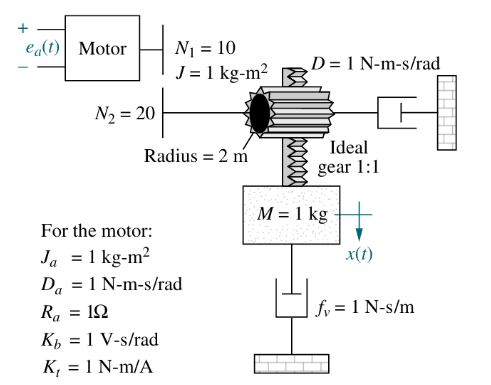

In [16]:
Ea, Tita, Titam, X, s, R, Kb, Kt, Ra, Jeq, Deq=symbols("Ea Tita Titam X s R Kb Kt Ra Jeq Deq")
eq1=Eq(-X+R*Tita,0) #relacion Tita-X
eq2=Eq(-Tita+Titam/2,0) #Relacion Tita-Tita_motor
eq3=Eq(-Ea/Titam+Ra/Kt*(Jeq*s**2+Deq*s)+Kb*s,0) #eq del motor
sol=solve((eq1,eq2,eq3),(X,Tita,Titam))
print("X/Ea =")
factor(sol[X],s)/Ea

X/Ea =


             Kt⋅R              
───────────────────────────────
2⋅s⋅(Deq⋅Ra + Jeq⋅Ra⋅s + Kb⋅Kt)

In [17]:
print("X/Ea =")
simplify(sol[X].subs([(R, 2), (Jeq, 2.25),(Deq, 2.25),(M, 1),(Kb, 1),(Kt, 1),(Ra, 1)]))/Ea

X/Ea =


        1        
─────────────────
s⋅(2.25⋅s + 3.25)

In [18]:
J=1;D=1;Ja=1;Da=1;M=1;Fv=1;n=0.5;R=2;
Jeq=Ja+J*n**2+M *n**2*R**2
Deq=Da+D*n**2+Fv*n**2*R**2
print(Jeq,Deq)

2.25 2.25


In [19]:
s=symbols("s")
G=1/(s+1) #relacion Tita-X
R=(G+G)/(1+G*G)
factor(R)

 2⋅(s + 1)  
────────────
 2          
s  + 2⋅s + 2

#Clase Practica 03

$$ e_L + e_R + e_b = e_a $$